In [144]:
import pandas as pd
#import matplotlib.pyplot as plt

In [145]:
url="https://en.wikipedia.org/wiki/2021_Formula_One_World_Championship"

## Find the tables with 'driver'

In [146]:
df = pd.read_html(url,match="Driver")

Print the first line of each to find the driver standings table

In [147]:
for i in df:
    print(i[:1])

                   Entrant            Constructor[14]  Chassis  \
                   Entrant            Constructor[14]  Chassis   
0  Alfa Romeo Racing Orlen  Alfa Romeo Racing-Ferrari  C41[15]   

          Power unit Race drivers  \
          Power unit          No.   
0  Ferrari 065/6[16]        78899   

                                                                           
                                         Driver name               Rounds  
0  Kimi Räikkönen[b] Robert Kubica Antonio Giovin...  1–13, 15–2213–14All  
                                                  0   \
0  Pos. Driver BHR EMI POR ESP MON AZE FRA STY AU...   

                                                  1    2    3    4    5    6   \
0  Key Colour Result Gold Winner Silver 2nd place...  NaN  NaN  NaN  NaN  NaN   

    7    8    9   ...   15   16   17   18   19   20   21   22   23   24  
0  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[1 rows x 25 columns]
  Pos.        

it's the third table that we want

In [148]:
df[2]

,Pos.,Driver,BHR,EMI,POR,ESP,MON,AZE,FRA,STY,...,ITA,RUS,TUR,USA,MXC,SAP,QAT,SAU,ABU,Points
0,1,Max Verstappen,2P,1,2,2F,1,18F,1PF,1P,...,Ret2 P,2,2,1P,1,22,2F,2,1PF,395.5
1,2,Lewis Hamilton,1,2PF,1,1P,7F,15,2,2F,...,Ret,1,5,2F,2,1,1P,1PF,2,387.5
2,3,Valtteri Bottas,3F,Ret,3PF,3,Ret,12,4,3,...,31,5,1PF,6,15PF,31 P,Ret,3,6,226
3,4,Sergio Pérez,5,11,4,5,4,1,3,4,...,5,9,3,3,3,4F,4,Ret,15,190
4,5,Carlos Sainz Jr.,8,5,11,7,2,8,11,6,...,6,3,8,7,6,63,7,8,3,164.5
5,6,Lando Norris,4,3,5,8,3,5,5,5,...,2,7PF,7,8,10,10,9,10,7,160
6,7,Charles Leclerc,6,4,6,4,DNSP,4P,16,7,...,4,15,4,4,5,5,8,7,10,159
7,8,Daniel Ricciardo,7,6,9,6,12,9,6,13,...,13 F,4,13,5,12,Ret,12,5,12,115
8,9,Pierre Gasly,17,7,10,10,6,3,7,Ret,...,Ret,13,6,Ret,4,7,11,6,5,110
9,10,Fernando Alonso,Ret,10,8,17,13,6,8,9,...,8,6,16,Ret,9,9,3,13,8,81


but there are rows at the bottom that are actually headers

![](driverstablescreenshot.png)

So we need to get rid of them and change the Points column to be numeric (they were strings because of the unwanted rows)

In [149]:
df2 = df[2][:-2]
df2.Points = pd.to_numeric(df2.Points)

C:\Users\jones\AppData\Local\Temp/ipykernel_20860/1630917830.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.Points = pd.to_numeric(df2.Points)


<AxesSubplot:xlabel='Driver'>

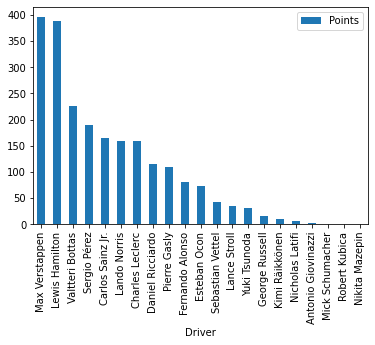

In [150]:
df2.plot.bar(x='Driver', y='Points')

In [151]:
races = df2.columns[2:-1]

In [170]:
import numpy as np
df3 = pd.DataFrame()
df3['Driver'] = df2['Driver']
for r in races:
    df3[f'Pole-{r}'] = df2[r].str.contains('P') 
    df3[r] = df2[r].replace('P','', regex=True)
    df3[f'Fastest-{r}'] = df2[r].str.contains('F') 
    df3[r] = df3[r].replace('F','', regex=True)
    df3[r] = df3[r].replace('Ret','', regex=True)
    df3[r] = df3[r].replace('DNS','', regex=True)
    df3[r] = df3[r].replace('WD','', regex=True)
    df3[r] = df3[r].replace(np.nan, '', regex=True)


df3

,Driver,Pole-BHR,BHR,Fastest-BHR,Pole-EMI,EMI,Fastest-EMI,Pole-POR,POR,Fastest-POR,...,Fastest-SAP,Pole-QAT,QAT,Fastest-QAT,Pole-SAU,SAU,Fastest-SAU,Pole-ABU,ABU,Fastest-ABU
0,Max Verstappen,True,2,False,False,1,False,False,2,False,...,False,False,2,True,False,2,False,True,1,True
1,Lewis Hamilton,False,1,False,True,2,True,False,1,False,...,False,True,1,False,True,1,True,False,2,False
2,Valtteri Bottas,False,3,True,False,,False,True,3,True,...,False,False,,False,False,3,False,False,6,False
3,Sergio Pérez,False,5,False,False,11,False,False,4,False,...,True,False,4,False,False,,False,False,15,False
4,Carlos Sainz Jr.,False,8,False,False,5,False,False,11,False,...,False,False,7,False,False,8,False,False,3,False
5,Lando Norris,False,4,False,False,3,False,False,5,False,...,False,False,9,False,False,10,False,False,7,False
6,Charles Leclerc,False,6,False,False,4,False,False,6,False,...,False,False,8,False,False,7,False,False,10,False
7,Daniel Ricciardo,False,7,False,False,6,False,False,9,False,...,False,False,12,False,False,5,False,False,12,False
8,Pierre Gasly,False,17,False,False,7,False,False,10,False,...,False,False,11,False,False,6,False,False,5,False
9,Fernando Alonso,False,,False,False,10,False,False,8,False,...,False,False,3,False,False,13,False,False,8,False


<AxesSubplot:xlabel='Driver'>

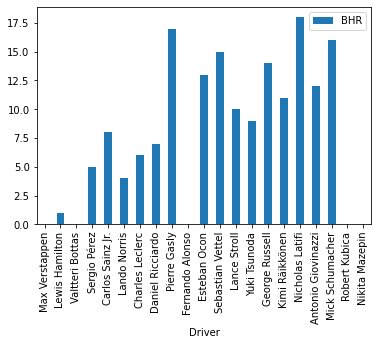

In [ ]:
df3.plot.bar(x='Driver', y='BHR')

In [ ]:
url = "https://www.racefans.net/2021-f1-season/2021-f1-statistics/2021-f1-championship-points/"
df = pd.read_html(url,match="Driver")

,Unnamed: 0,Driver,Total,1,2,3,4,5,6,7,...,13,14,15,16,17,18,19,20,21,22
0,1,Max Verstappen,395.5,18.0,25.0,18.0,19.0,25.0,0.0,26.0,...,25.0,0.0,18.0,18.0,25.0,25.0,18.0,19.0,18.0,26.0
1,2,Lewis Hamilton,387.5,25.0,19.0,25.0,25.0,7.0,0.0,18.0,...,19.0,0.0,25.0,10.0,19.0,18.0,25.0,25.0,26.0,18.0
2,3,Valtteri Bottas,226.0,16.0,0.0,16.0,15.0,0.0,0.0,12.0,...,15.0,15.0,10.0,26.0,8.0,0.0,15.0,0.0,15.0,8.0
3,4,Sergio Perez,190.0,10.0,0.0,12.0,10.0,12.0,25.0,15.0,...,4.0,10.0,2.0,15.0,15.0,15.0,13.0,12.0,0.0,0.0
4,5,Carlos Sainz Jnr,164.5,4.0,10.0,0.0,6.0,18.0,4.0,0.0,...,6.0,8.0,15.0,4.0,6.0,8.0,8.0,6.0,4.0,15.0
5,6,Lando Norris,160.0,12.0,15.0,10.0,4.0,15.0,10.0,10.0,...,1.0,18.0,7.0,6.0,4.0,1.0,1.0,2.0,1.0,6.0
6,7,Charles Leclerc,159.0,8.0,12.0,8.0,12.0,0.0,12.0,0.0,...,10.0,12.0,0.0,12.0,12.0,10.0,10.0,4.0,6.0,1.0
7,8,Daniel Ricciardo,115.0,6.0,8.0,2.0,8.0,0.0,2.0,8.0,...,0.0,26.0,12.0,0.0,10.0,0.0,0.0,0.0,10.0,0.0
8,9,Pierre Gasly,110.0,0.0,6.0,1.0,1.0,8.0,15.0,6.0,...,12.0,0.0,0.0,8.0,0.0,12.0,6.0,0.0,8.0,10.0
9,10,Fernando Alonso,81.0,0.0,1.0,4.0,0.0,0.0,8.0,4.0,...,8.0,4.0,8.0,0.0,0.0,2.0,2.0,15.0,0.0,4.0


<AxesSubplot:xlabel='Driver'>

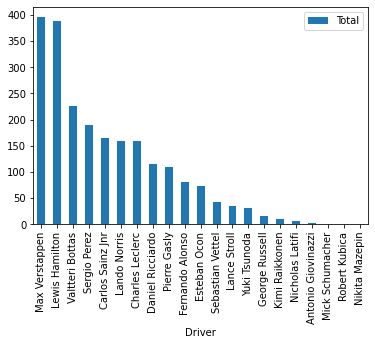

In [ ]:
df4 = df[0]
df4.plot.bar(x='Driver', y='Total')

df4.plot.bar()